In [79]:
import pandas as pd
import numpy as np






In [2]:
# 한글 data는 항상 인코딩 타입을 설정해 주어야 한다.
CCTV_Seoul = pd.read_csv('./data/CCTV_in_Seoul.csv',encoding='utf-8')

In [3]:
CCTV_Seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [4]:
# CCTV_Seoul의 컬럼명
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
CCTV_Seoul.columns[0]

'기관명'

In [6]:
# 기관명을 구별로 변환
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'},inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [7]:
# Excel로 저장된 인구현황 불러오기 - 데이터가 너무 많아서 엑셀로 읽지 못하는 상황 가정.
pop_Seoul = pd.read_excel('./data/population_in_Seoul.xls',encoding='utf-8')
pop_Seoul.head()






,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [8]:
# usecols 는 엑셀의 칼럼순서이다. 
pop_Seoul = pd.read_excel('./data/population_in_Seoul.xls',header=2,usecols='B,D,G,J,N',encoding='utf-8')
pop_Seoul.head()






,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
# 열이름 변경 - 여러가지 컬럼을 변경해야 한다.
pop_Seoul.rename(columns={
    pop_Seoul.columns[0] : '구별',
    pop_Seoul.columns[1] : '인구수',
    pop_Seoul.columns[2] : '한국인',
    pop_Seoul.columns[3] : '외국인',
    pop_Seoul.columns[4] : '고령자'},inplace = True)
pop_Seoul.head()






,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [10]:
# CCTV의 소계 기준으로 오름차순 정리(댓수가 적은 지역부터 추출)
CCTV_Seoul.sort_values(by='소계',ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [11]:
# 3년간 CCTV 증가율을 구해서 CCTV가 가장 많이 증가한 구를 검색!
# 최근 증가율 : 최근 3년치 CCTV 대수(2014~2016)더하고 2013년도 이전CCTV 대수로 나누어서 100 곱한다.
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] +CCTV_Seoul['2016년'])/CCTV_Seoul['2013년도 이전'] *100
CCTV_Seoul.head()






,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [59]:
CCTV_Seoul.sort_values(by='최근증가율' ,ascending=False).head()






,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [13]:
# 서울 인구데이터 중 필요없는 데이터 제거
pop_Seoul.drop([0],inplace=True)

In [14]:
# 구별 항목의 유일성 확인
pop_Seoul['구별'].unique()






array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [15]:
#nan 데이터의 위치 및 내용 확인
pop_Seoul[pop_Seoul['구별'].isnull()]






,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [16]:
# 26번 데이터 삭제
pop_Seoul.drop([26],inplace=True)
pop_Seoul.head()






,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [17]:
# pop_Seoul 외국인 비을 컴럼 생성 후 비율 데이터 추가
pop_Seoul['외국인비율'] = pop_Seoul['외국인']/(pop_Seoul['한국인']+pop_Seoul['외국인'])*100
pop_Seoul.head()






,구별,인구수,한국인,외국인,고령자,외국인비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852


In [18]:
pop_Seoul['고령자비율'] = pop_Seoul['고령자']/(pop_Seoul['한국인']+pop_Seoul['외국인'])*100
pop_Seoul.head()






,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [19]:
pop_Seoul['한국인비율'] = pop_Seoul['한국인']/(pop_Seoul['한국인']+pop_Seoul['외국인'])*100
pop_Seoul.head()






,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,94.330549
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,93.299310
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,93.961172
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,97.473365
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,95.982148


In [20]:
pop_Seoul.sort_values(by='외국인비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191,91.336402
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,92.657655
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,92.992002
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,93.299310
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,93.961172


In [21]:
pop_Seoul.sort_values(by='고령자비율',ascending=False).head()






,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,98.938194
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,94.330549
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,93.299310
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,93.961172
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797,96.276779


In [58]:
totpop = pop_Seoul['인구수'].sum()
pop_Seoul['전체대비인구비율'] = pop_Seoul['인구수']/(totpop)*100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율,전체대비인구비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,94.330549,1.596650
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,93.299310,1.306581
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,93.961172,2.394710
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,97.473365,3.052129
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,95.982148,3.649524


In [31]:
pop_Seoul.sort_values(by='전체대비인구비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율,전체대비인구비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,98.966416,6.545489
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,98.919460,5.920724
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,99.132340,5.594451
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,99.329275,5.583508
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,96.515418,5.153318


In [28]:
pop_Seoul.sort_values(by='고령자',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율,전체대비인구비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,98.919460,5.920724
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,98.966416,6.545489
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,99.100909,4.848080
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,99.329275,5.583508
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,96.515418,5.153318


In [30]:
pop_Seoul.sort_values(by='전체대비인구비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율,전체대비인구비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,98.966416,6.545489
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,98.919460,5.920724
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,99.132340,5.594451
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,99.329275,5.583508
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,96.515418,5.153318


In [32]:
# CCTV 데이터와 인구현황 데이터 합치기

In [33]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [34]:
# 인덱스가 다르니까 구별을 이용해서 merge 해보자
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율,전체대비인구비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,94.330549,1.596650
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,93.299310,1.306581
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,93.961172,2.394710
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,97.473365,3.052129
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,95.982148,3.649524


In [35]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul,on='구별')
data_result.head()






,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율,전체대비인구비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,99.132340,5.594451
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,99.070235,4.444505
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,98.938194,3.237937
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,98.919460,5.920724
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,96.515418,5.153318


In [36]:
# 년도별 CCTV  컬럼 삭제 - 너무 많아
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율,전체대비인구비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,99.132340,5.594451
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,99.070235,4.444505
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,98.938194,3.237937
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,98.919460,5.920724
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,96.515418,5.153318


In [38]:
# 인덱스 변경
data_result.set_index('구별',inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율,전체대비인구비율
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,99.132340,5.594451
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,99.070235,4.444505
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,98.938194,3.237937
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,98.919460,5.920724
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,96.515418,5.153318


In [40]:
data_result['인구수'].head()

구별
강남구    570500.0
강동구    453233.0
강북구    330192.0
강서구    603772.0
관악구    525515.0
Name: 인구수, dtype: float64

-----------------
# 상관계수

- 상관계수의 절댓값이 0.1이하(-값도 있을 수 있기 때문에) : 무시
- 상관계수의 절댓값이 0.3이하 : 약한 상관
- 상관계수의 절댓값이 0.7이하 : 상관 있음
- 상관계수의 절댓값이 0.7초과 : 뚜렷한 상관

In [51]:
# 고령자 비율과 소계의 상관계수
data_result['고령자비율'].corr(data_result['소계'])*100






-28.07855379005006

In [52]:
# 외국인 비율과 소계의 상관계수
data_result['외국인비율'].corr(data_result['소계'])*100






-13.60743287819445

In [53]:
# 고령자과 소계의 상관계수 - 고령자 count는 고령자에 대한 이야기가 아님 / 인구수커지면 고령자 커져서
data_result['고령자'].corr(data_result['소계'])*100






25.519597961667586

In [54]:
# 외국인과 소계의 상관계수
data_result['외국인'].corr(data_result['소계'])*100






-2.3786186776062057

In [55]:
# 인구수가 많을수록 고령자가 많다.! 고령자 비율과 고령자 수는 다른 이야기임을 알 수 있다.
data_result['인구수'].corr(data_result['고령자'])*100






93.26672939393349

In [56]:
# 인구수와 CCTV소계의 상관
data_result['인구수'].corr(data_result['소계'])*100






30.63422793679264

==> (결론)  인구수와 소계가 상관이 있다.

In [57]:
# CCTV 소계의 내림차순
data_result.sort_values(by='소계',ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율,전체대비인구비율
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,99.132340,5.594451
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,99.160587,4.706772
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,99.041549,4.415841
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,99.100909,4.848080
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,93.961172,2.394710


In [60]:
# 인구수의 내림차순
data_result.sort_values(by='인구수',ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율,전체대비인구비율
구별,,,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,98.966416,6.545489
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,98.919460,5.920724
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,99.132340,5.594451
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,99.329275,5.583508
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,96.515418,5.153318


----------------
# 시각화
여기까지의 데이터 시각화! - python에서는 2byte code 지원하지 않는다.

In [61]:
# 한글 폰트 문제 해결
# %matplotlib 은 한글 폰트를 지원하지 않는다.
# os 정보
import platform
#font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# 시각화 도구
from matplotlib import pyplot as plt
%matplotlib inline # 인라인은 한번 그리면 못바꾼다.!










In [63]:
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font',family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/malgun.ttf' 
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print("Unkown System")
    









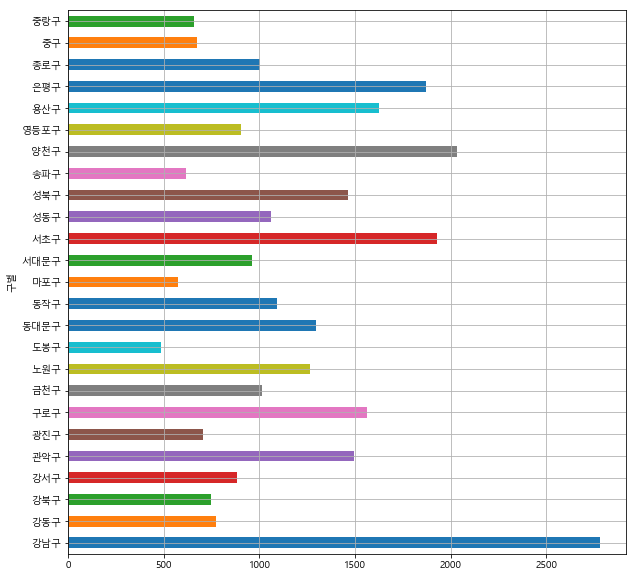

In [66]:
data_result['소계'].plot(kind='barh',grid=True, figsize=(10,10))

In [69]:
data_result.to_csv('./data/cctv_result.csv')

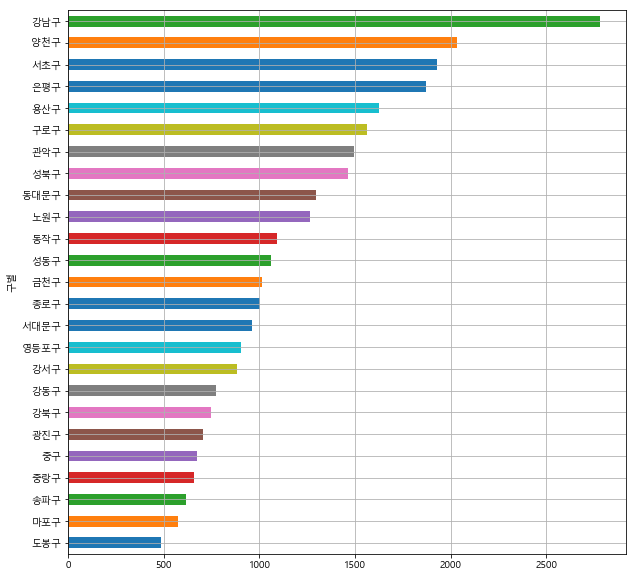

In [74]:
data_result['소계'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))
plt.show()

-----------------
# 인구대비 CCTV 비율

In [75]:
data_result['CCTV비율'] = data_result['소계']/data_result['인구수']*100

In [76]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,한국인비율,전체대비인구비율,CCTV비율
구별,,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,99.132340,5.594451,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,99.070235,4.444505,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,98.938194,3.237937,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,98.919460,5.920724,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,96.515418,5.153318,0.284673


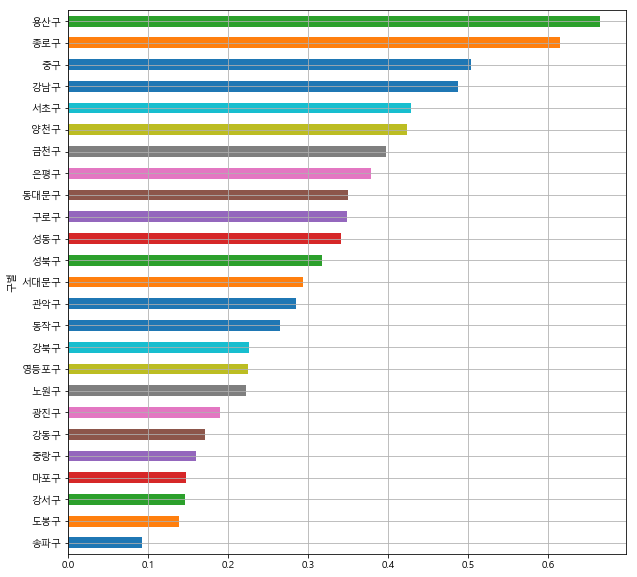

In [77]:
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))

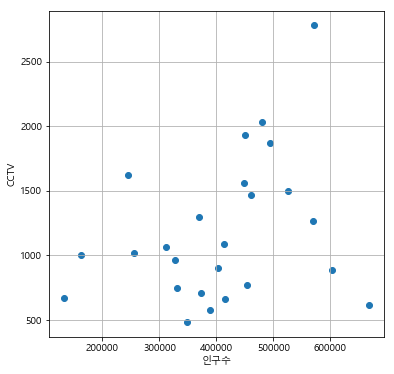

In [78]:
# 산점도를 이용한 시각화
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()

In [80]:
# 인구수 , 소계에 따른 기준 직선(회귀선) 만들기
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
fp1






array([1.30916415e-03, 6.45066497e+02])

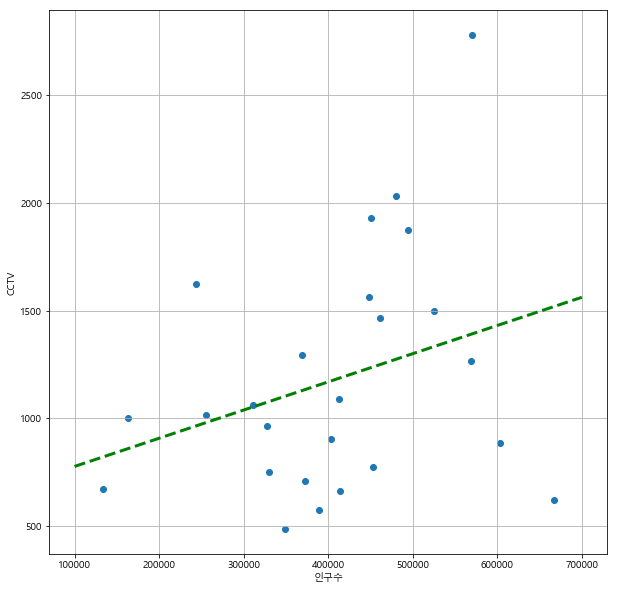

In [82]:
# y축 만들기 : CCTV 소계
# x축 만들기 : 인구수
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000) # x축을 10만부터 70만까지 보이게 하려고

plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'],data_result['소계'])
plt.plot(fx,f1(fx),ls='dashed',lw=3, color='g') #회귀선 그리기
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()










In [91]:
# 회귀선과의 오차를 구해보자.
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
f1 = np.poly1d(fp1) # y축의 값
fx = np.linspace(100000,700000) #10만에서 70만까지의 x축 값을 지정

# 소계에서 기준 인구수 차이로 오차값 구하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수'])) # f1(data_result['인구수'])는 x축에 따른 회귀선 y 의 값.

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort['오차'].tail()










구별
노원구     125.483618
서대문구    111.376568
동작구      94.122892
금천구      35.989293
성동구       9.464016
Name: 오차, dtype: float64

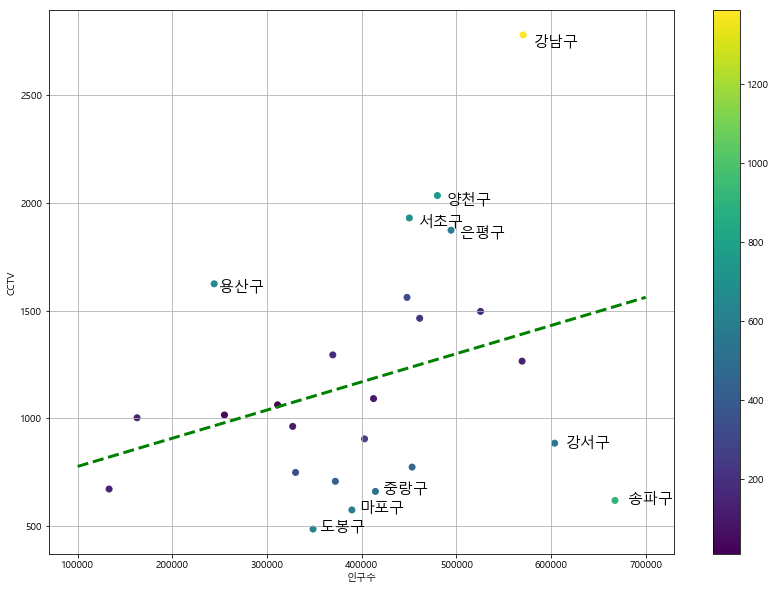

In [93]:
# 그래프에 텍스트와 color
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'],data_result['소계'],c=data_result['오차']) #오차로 칼라바를 구했다.
plt.plot(fx,f1(fx),ls = 'dashed',lw=3,color='g')
#오차가 가장 큰 10개 구에 텍스트 붙이기
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02,
            df_sort['소계'][n]*0.98,
            df_sort.index[n],fontsize=15) # 인구수 소계에 곱한 숫자는 조금 찍히는 위치를 조정해주기 위해서 쓴 것. 
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.grid()
plt.show()








